4.Over the years - male or female deaths
-----------------------------------------
----------------------

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

def replaceNan(data, indxs, val):
    for (i,v) in enumerate(indxs):
        if v == True:
            data[i] = val

f = pandas.read_excel("./tables/drugDeaths/femaleDeaths.xlsx")
m = pandas.read_excel("./tables/drugDeaths/maleDeaths.xlsx")

f_deaths = {}
m_deaths = {}

for god in range(1995,2018):
    for i,j in f.iterrows():
        broj = np.sum(f[god])
        f_deaths[god] = broj
        
for god in range(1995,2018):
    for i,j in m.iterrows():
        broj = np.sum(m[god])
        m_deaths[god] = broj
        
f_godini = [k for k  in f_deaths.keys()]
f_broj = [v for v in f_deaths.values()]
m_godini = [k for k in m_deaths.keys()] 
m_broj = [v for v in m_deaths.values()]


<Figure size 432x288 with 0 Axes>

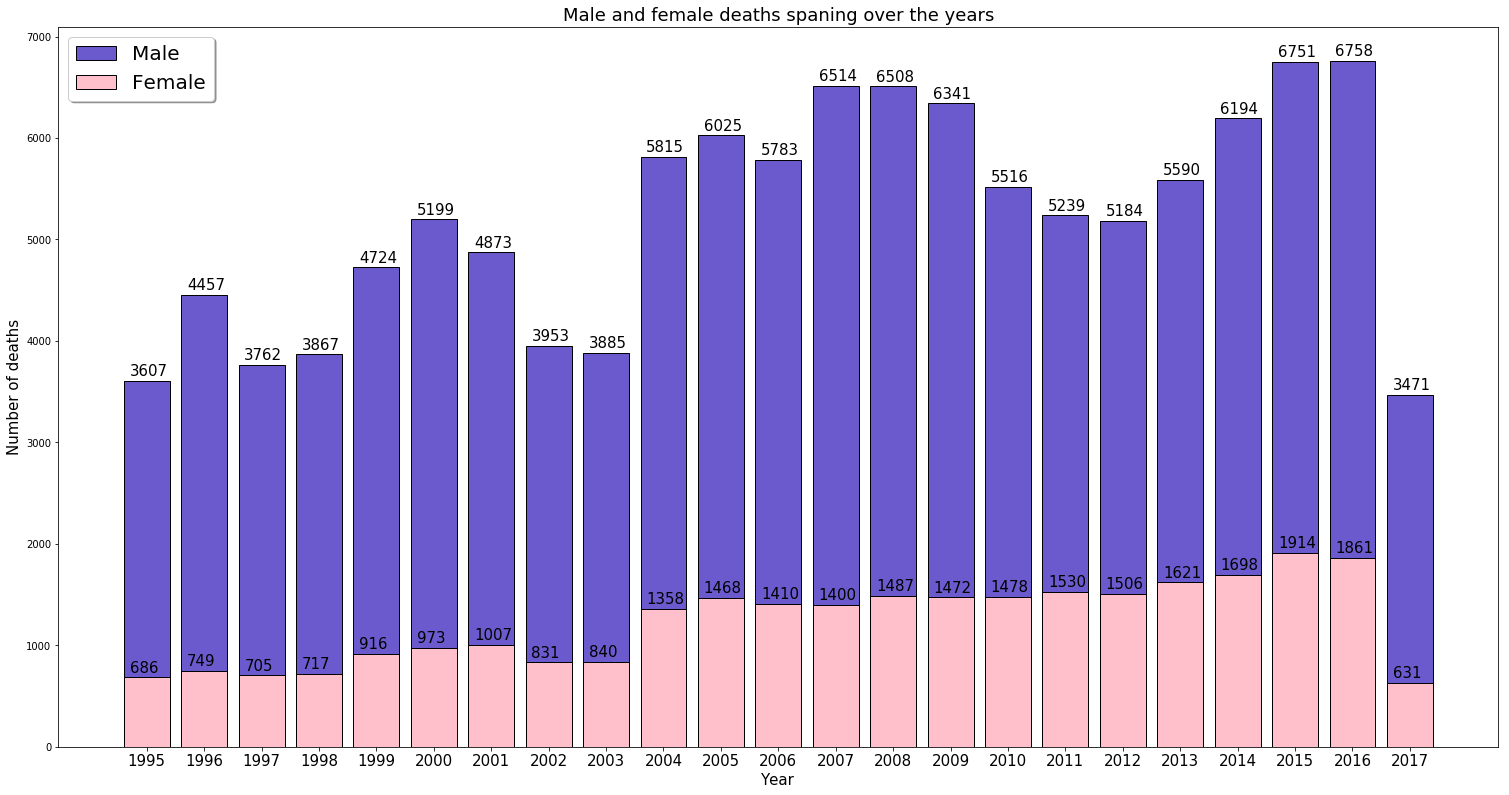

In [2]:
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

ax.bar(m_godini, m_broj, color="slateblue", label="Male", align='center', edgecolor="black")   # #2edf87(blue color)
ax.bar(f_godini , f_broj, color="pink", label="Female", align='center', edgecolor="black")
plt.xticks(m_godini, fontsize = 15)
plt.title("Male and female deaths spaning over the years", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of deaths", fontsize=15)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.10, i.get_height() + 50, \
            str(int((i.get_height()))), fontsize=15, color='black')
        
plt.legend(loc = 0, fontsize = 20, shadow = True)


3.Deaths and age()
------------------
-----------------------------------------------------

In [3]:
tables = ["deaths15-19.xlsx", "deaths20-24.xlsx", "deaths25-29.xlsx", "deaths30-34.xlsx", 
          "deaths35-39.xlsx" ,"deaths40-44.xlsx" ,"deaths45-49.xlsx", "deaths50-54.xlsx",
          "deaths55-59.xlsx", "deaths60-64.xlsx" , "deaths65-inf.xlsx"]
age = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-inf"]
dic = {}

for t,age in zip(tables,age):
    a = pandas.read_excel("./tables/drugDeaths/" + t)
    broj = 0
    for god in range(1995,2018):
        for i,j in a.iterrows():
            broj += np.sum(a[god])
    
    dic[age] = broj
            
ages = [k for k in dic.keys()]
deaths = [v for v in dic.values()]

<Figure size 432x288 with 0 Axes>

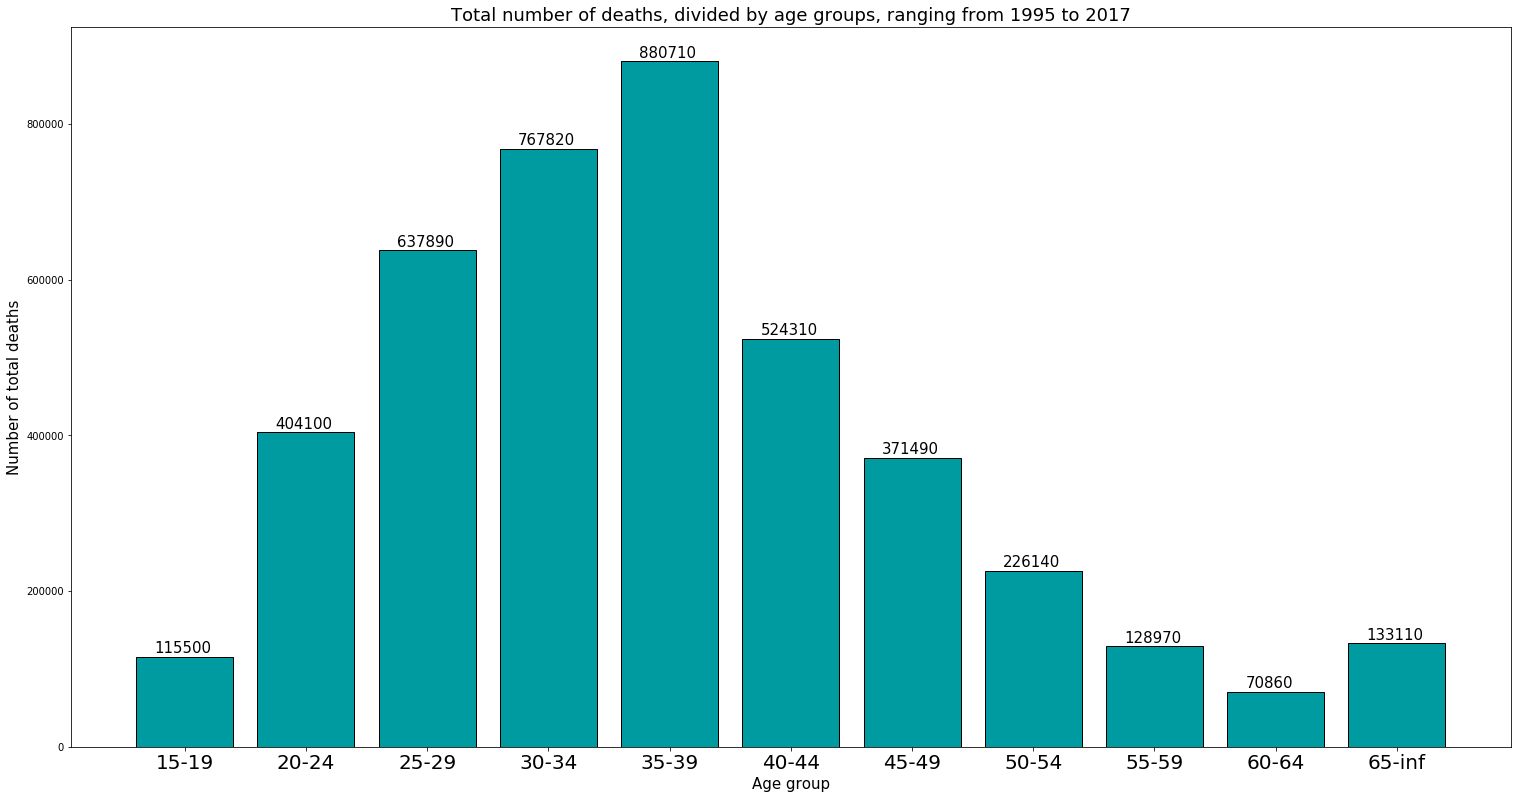

In [4]:
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

ax.bar(ages, deaths, color="#009ba1", align='center', edgecolor="black") 
plt.title("Total number of deaths, divided by age groups, ranging from 1995 to 2017", fontsize=18)
plt.xlabel("Age group", fontsize=15)
plt.ylabel("Number of total deaths", fontsize=15)
plt.xticks(size = 20)
plt.yticks(size = 10)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.15, i.get_height() + 5000, \
            str(int((i.get_height()))), fontsize=15, color='black')

2.Price vs consumation
--------------
--------------

In [5]:
def culmulative(arr):
    zbir = arr[0]
    for i,_ in enumerate(arr):
        if i > 0:
            zbir += arr[i]
            arr[i] = zbir
            
    return arr

def read_table(user, price, high_country, mid_country, mid_country1, low_country):
    users = pandas.read_excel("./tables/drugOffenses/%s" % user)
    user_dic = {}
    
    for i, row in users.iterrows():
        if type(row["Country"]) is str:
            country = row["Country"].strip().replace("*", "").strip()
            a = []
            
            for j in range(2005, 2018):
                if(np.isnan(row[j])):
                    a.append(0)
                else: 
                    a.append(row[j])  
            user_dic[country] = a
        
    prices = pandas.read_excel("./tables/pricePurity/%s" % price)
    price_dic = {}
    
    for i, row in prices.iterrows():
        if type(row["Country"]) is str:
            country = row["Country"].strip().replace("*", "").strip()
            b = []  

            for j in range(2005,2018):
                if(np.isnan(row[j])):
                    b.append(0)
                else: 
                    b.append(row[j])    
            price_dic[country] = b
        
    high = {}
    
    for i,p in enumerate(price_dic[high_country]):
        high[p] = int(user_dic[high_country][i])

    p_high = sorted(high)
    u_high = []
    for v in p_high:
        u_high.append(high[v])
        
    mid = {}
    
    for i,p in enumerate(price_dic[mid_country]):
        mid[p] = int(user_dic[mid_country1][i])

    p_mid = sorted(mid)
    u_mid = []
    for v in p_mid:
        u_mid.append(mid[v])
        
    low = {}
    
    for i,p in enumerate(price_dic[low_country]):
        low[p] = int(user_dic[low_country][i])

    p_low = sorted(low)
    u_low = []
    for v in p_low:
        u_low.append(low[v])
        
    return p_high, culmulative(u_high), p_mid, culmulative(u_mid), p_low, culmulative(u_low)
                

In [9]:
cocaine_p_high, cocaine_u_high, cocaine_p_med, cocaine_u_med, cocaine_p_low, cocaine_u_low = read_table("cocaineUsers.xlsx","cocainePriceMean.xlsx","Germany","Belgium-A","Belgium","Portugal")
cannabis_p_high, cannabis_u_high, cannabis_p_med, cannabis_u_med, cannabis_p_low, cannabis_u_low = read_table("cannabisUsers.xlsx","cannabisPriceMean.xlsx","Germany","Belgium-A","Belgium","Portugal")
ecstasy_p_high, ecstasy_u_high, ecstasy_p_med, ecstasy_u_med, ecstasy_p_low, ecstasy_u_low = read_table("ecstasyUsers.xlsx","ectasyPriceMean.xlsx","Germany","Belgium-A","Belgium","Portugal")

In [10]:
heroin_users = pandas.read_excel("./tables/drugOffenses/heroinUsers.xlsx")
heroin_users_dic = {}

for i,row in heroin_users.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        users = []
        
        for j in range(2005,2018):
            if(np.isnan(row[j])):
                users.append(0)
            else: 
                users.append(row[j])  
        heroin_users_dic[country] = users


heroin_brown_price = pandas.read_excel("./tables/pricePurity/brownHeroinPriceMean.xlsx")
heroin_white_price = pandas.read_excel("./tables/pricePurity/whiteHeroinPriceMean.xlsx")
heroin_price_dic = {}

for i,row in heroin_brown_price.iterrows():
    prices = [] 
    for k,row1 in heroin_white_price.iterrows():
        if i == k:
            if type(row["Country"]) is str:
                country = row["Country"].strip().replace("*", "").strip()
                for j in range(2005,2018):
                    arr = []
                    if np.isnan(row[j]) and np.isnan(row1[j]):
                        arr.append(0)
                        arr.append(0)
                    elif np.isnan(row1[j]): 
                        arr.append(0) 
                        arr.append(row[j])
                    elif  np.isnan(row[j]):
                        arr.append(0)
                        arr.append(row1[j])
                    else:
                        arr.append(row[j])
                        arr.append(row1[j])
                    prices.append(round(sum(arr)/2,2))
            heroin_price_dic[country] = prices
            break
        
heroin_high = {}

for i,p in enumerate(heroin_price_dic["Italy"]):
    heroin_high[p] = int(heroin_users_dic["Italy"][i])
    
heroin_p_high = sorted(heroin_high)
heroin_u_high = []
for v in heroin_p_high:
    heroin_u_high.append(heroin_high[v])

heroin_med = {}
for i,p in enumerate(heroin_price_dic["Belgium-B"]):
    heroin_med[p] = int(heroin_users_dic["Belgium"][i])
    
heroin_p_med = sorted(heroin_med)
heroin_u_med = []
for v in heroin_p_med:
    heroin_u_med.append(heroin_med[v])
    
heroin_low = {}
for i,p in enumerate(heroin_price_dic["Portugal"]):
    heroin_low[p] = int(heroin_users_dic["Portugal"][i])
    
heroin_p_low = sorted(heroin_low)
heroin_u_low = []
for v in heroin_p_low:
    heroin_u_low.append(heroin_low[v])

heroin_u_high = culmulative(heroin_u_high)
heroin_u_med = culmulative(heroin_u_med)
heroin_u_low = culmulative(heroin_u_low)

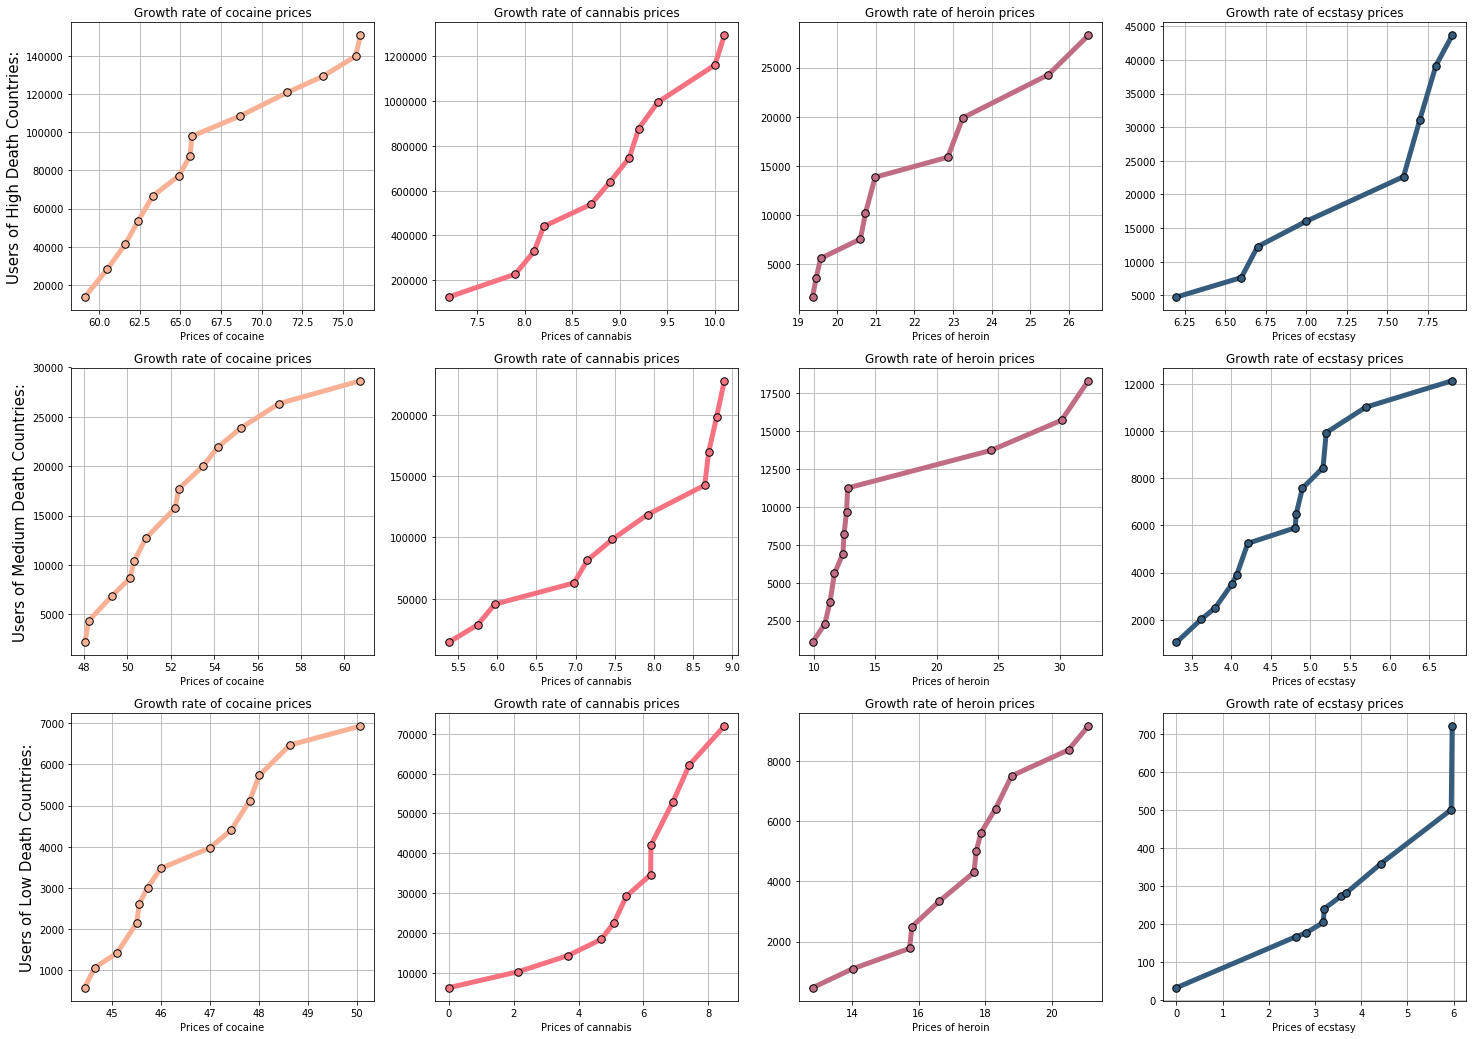

In [13]:
fig, axs = plt.subplots(3, 4, figsize=(25,18))

axs[0, 0].set_ylabel("Users of High Death Countries:", fontsize=15)
axs[1, 0].set_ylabel("Users of Medium Death Countries:", fontsize=15)
axs[2, 0].set_ylabel("Users of Low Death Countries:", fontsize=15)

drugs = ["cocaine", "cannabis", "heroin", "ecstasy"]
for x in range(0,3):
    for y in range(0,4):
        axs[x, y].set_xlabel("Prices of %s" % drugs[y])
        axs[x, y].set_title("Growth rate of %s prices" % drugs[y])
        axs[x, y].grid()

axs[0, 0].plot(cocaine_p_high, cocaine_u_high, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#f8b195")
axs[0, 1].plot(cannabis_p_high, cannabis_u_high, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#f67280")
axs[0, 2].plot(heroin_p_high[:-1], heroin_u_high[:-1], linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#c06c84")
axs[0, 3].plot(ecstasy_p_high, ecstasy_u_high, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#355c7d")

axs[1, 0].plot(cocaine_p_med, cocaine_u_med, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#f8b195" )
axs[1, 1].plot(cannabis_p_med, cannabis_u_med, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#f67280")
axs[1, 2].plot(heroin_p_med[:-1], heroin_u_med[:-1], linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#c06c84")
axs[1, 3].plot(ecstasy_p_med, ecstasy_u_med, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#355c7d")

axs[2, 0].plot(cocaine_p_low, cocaine_u_low, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#f8b195")
axs[2, 1].plot(cannabis_p_low, cannabis_u_low, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#f67280")
axs[2, 2].plot(heroin_p_low[:-1], heroin_u_low[:-1], linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#c06c84")
axs[2, 3].plot(ecstasy_p_low, ecstasy_u_low, linewidth=5, marker = ".", markersize = 15, markeredgecolor = "black", color = "#355c7d")


1.Price vs deaths
--------------
-------------

In [ ]:
total_deaths = {}
for i,row in m.iterrows():
    for j, row1 in f.iterrows():
        if i == j:
            for x in range(1995,2018):k
                total_deaths[x] = np.sum(f[x]) + np.sum(m[x])
    
price_mean = {}

for i, row in cannabis_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] = round(np.mean(cannabis_price[x]),2) 
        
for i, row in cocaine_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(cocaine_price[x]),2)
                
for i, row in ecstasy_prices.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(ecstasy_prices[x]),2)

for i, row in heroin_brown_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(heroin_brown_price[x]),2)
        
for i, row in heroin_white_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(heroin_white_price[x]),2)
        price_mean[x] = price_mean[x] / 5
        
price_list = []
death_list = []
years = []

for i in range(1996,2018):
    price_list.append(int(price_mean[i]))
    death_list.append(int(total_deaths[i]))
    years.append(i)


In [ ]:
fig, axs = plt.subplots( 1, 2 ,figsize=(25,10))
axs[0].set_xticks(years[:-1], )
axs[1].set_xticks(years[:-1], )
axs[0].set_yticks([i for i in range(0,101,5)])
axs[1].set_yticks([i for i in range(0,10000,250)])
axs[0].grid()
axs[1].grid()

axs[0].plot(years[:-1], price_list[:-1], color = "#ff5733", linewidth=5, marker = ".", markersize = 18, markeredgecolor = "black", label="Price of drugs throught the years.")
axs[1].plot(years[:-1], death_list[:-1], color = "#c70039", linewidth=5, marker = ".", markersize = 18, markeredgecolor = "black", label="Deaths throught the years.")

axs[0].legend(loc = 0, fontsize = 20, shadow = True)  
axs[1].legend(loc = 0, fontsize = 20, shadow = True)   


In [ ]:
fig = plt.figure()
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_xticks([i for i in range(0,101,5)])
ax.set_yticks([i for i in range(0,9001,250)])
ax.grid()
plt.xlabel("Price of drugs.", fontsize = 15)
plt.ylabel("Number of deaths", fontsize = 15)
ax.scatter(price_list, death_list, marker="o", edgecolors="black",s = 70, color = "#900c3f")
